In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [105]:
# df = pd.read_csv("Iris.csv")
# or
df = pd.read_csv("https://raw.githubusercontent.com/imagineacreativeusername/oibsip-taskno-1/main/Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [106]:
df = df.iloc[:,1:] #removing the Id column as it is of no use
# or
# df = df.drop(["Id"], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [107]:
print(df["Species"].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


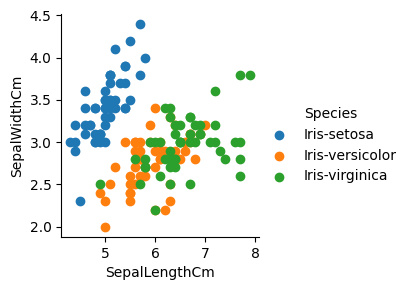

In [108]:
sns.FacetGrid(df, hue="Species").map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

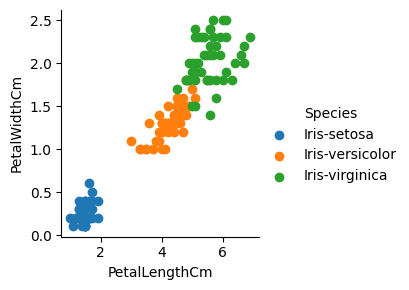

In [109]:
sns.FacetGrid(df, hue="Species").map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

In [110]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Species",axis=1),df["Species"], test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((112, 4), (38, 4), (112,), (38,))

In [111]:
model = RandomForestClassifier(criterion='gini', n_estimators=1, max_depth=10)
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9910714285714286

In [112]:
prediction = model.predict(x_test)
expected = y_test
print(metrics.classification_report(expected, prediction))
print(metrics.confusion_matrix(expected, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

[[13  0  0]
 [ 0 10  1]
 [ 0  2 12]]
